**Imports**

---



In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
# Copy new folder paths to run from your own drive
THUMBS_DOWN = '/content/drive/MyDrive/1770FinalProject/thumbs_down_images'
THUMBS_UP = '/content/drive/MyDrive/1770FinalProject/thumbs_up_images'
NUMBER_ONE = '/content/drive/MyDrive/1770FinalProject/number_one_images'
NUMBER_TWO = '/content/drive/MyDrive/1770FinalProject/number_two_images'
NUMBER_THREE = '/content/drive/MyDrive/1770FinalProject/number_three_images'
NUMBER_FOUR = '/content/drive/MyDrive/1770FinalProject/number_four_images'
NUMBER_FIVE = '/content/drive/MyDrive/1770FinalProject/number_five_images'
PROCESSED_IMAGES = '/content/drive/MyDrive/1770FinalProject/processed_images'
PRED_IMAGES = '/content/drive/MyDrive/1770FinalProject/pred_images'
MODEL = '/content/drive/MyDrive/1770FinalProject/model'

**The Model**
The purpose of this model is to use a custom-made dataset to perform transfer learning on MobilenetV2 in order to do a custom hand-gesture recognition task
---



In [ ]:
model = MobileNetV2(weights = 'imagenet')

Creating image array

In [ ]:
import numpy as np

labels = []
data = []

Pre processing images - only do this once! Then restart the program to free up system memory

In [ ]:
from imageio.v2 import imread
from skimage.transform import resize
from keras.applications.mobilenet_v2 import preprocess_input
import os

# thumbs down images
for i in range(0, 500):
    im = imread(f'{THUMBS_DOWN}/thumbs_down{i}.png')
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    np.save(os.path.join(PROCESSED_IMAGES, f'processed_image{i}.npy'), im)
    # data[i] = im
    # labels[i] = 0

# thumbs up images
for i in range(0, 500):
    im = imread(f'{THUMBS_UP}/thumbs_up{i}.png')
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    np.save(os.path.join(PROCESSED_IMAGES, f'processed_image{i+500}.npy'), im)
    # data[i + 500] = im
    # labels[i + 500] = 1


# number one images
for i in range(0, 500):
    im = imread(f'{NUMBER_ONE}/number_one{i}.png')
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    np.save(os.path.join(PROCESSED_IMAGES, f'processed_image{i+1000}.npy'), im)
    # data[i + 1000] = im
    # labels[i + 1000] = 2

# number two images
for i in range(0, 500):
    im = imread(f'{NUMBER_TWO}/number_two{i}.png')
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    np.save(os.path.join(PROCESSED_IMAGES, f'processed_image{i+1500}.npy'), im)
    # data[i + 1500] = im
    # labels[i + 1500] = 3

# number three images
for i in range(0, 500):
    im = imread(f'{NUMBER_THREE}/number_three{i}.png')
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    np.save(os.path.join(PROCESSED_IMAGES, f'processed_image{i+2000}.npy'), im)
    # data[i + 2000] = im
    # labels[i + 2000] = 4

# number four images
for i in range(0, 500):
    im = imread(f'{NUMBER_FOUR}/number_four{i}.png')
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    np.save(os.path.join(PROCESSED_IMAGES, f'processed_image{i+2500}.npy'), im)
    # data[i + 2500] = im
    # labels[i + 2500] = 5


# number five images
for i in range(0, 500):
    im = imread(f'{NUMBER_FIVE}/number_five{i}.png')
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    np.save(os.path.join(PROCESSED_IMAGES, f'processed_image{i+3000}.npy'), im)
    # data[i + 3000] = im
    # labels[i + 3000] = 6


Pull the processed images from drive into the program

In [ ]:
import os
# load the preprocessed images
for i in range(0, 3500):
  image_path = os.path.join(PROCESSED_IMAGES, f'processed_image{i}.npy')
  processed_image = np.load(image_path)
  data.append(processed_image)
for i in range(7):
  labels.extend([i]*500)

Training + validation set up

In [ ]:
import random

# shuffle the training data together

total_data = list(zip(data, labels))
random.shuffle(total_data)

# recover the data and the labels
data_shuffled, labels_shuffled = zip(*total_data)
data_shuffled, labels_shuffled = list(data_shuffled), list(labels_shuffled)

# split into training data and validation data
# 75 / 25 split
train_data = np.array(data_shuffled[:2625])
train_labels = np.array(labels_shuffled[:2625])

validate_data = np.array(data_shuffled[2625:])
validate_labels = np.array(labels_shuffled[2625:])

Creating and inserting own output layer

In [ ]:
from keras.layers import Dense

model_output = Dense(7, activation = 'softmax')
model_output = model_output(model.layers[-2].output)

The new model

In [ ]:
from keras import Model

gesture_model = Model(inputs = model.input, outputs = model_output)

Prep model for transfer learning

In [ ]:
# Freeze all the layers except the last one
for layer in gesture_model.layers[:-1]:
  layer.trainable = False

# compile the model with our new changes
gesture_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Training

In [ ]:
import time
start_time = time.time()
train_results = gesture_model.fit(x=train_data, y=train_labels, validation_data=(validate_data, validate_labels), epochs = 50, verbose=2)
end_time = time.time()
print(f"Training time:{end_time - start_time}")

Epoch 1/50
83/83 - 14s - loss: 0.9060 - accuracy: 0.6682 - val_loss: 0.4569 - val_accuracy: 0.8800 - 14s/epoch - 163ms/step
Epoch 2/50
83/83 - 5s - loss: 0.3584 - accuracy: 0.9105 - val_loss: 0.2960 - val_accuracy: 0.9314 - 5s/epoch - 57ms/step
Epoch 3/50
83/83 - 5s - loss: 0.2518 - accuracy: 0.9413 - val_loss: 0.2495 - val_accuracy: 0.9326 - 5s/epoch - 57ms/step
Epoch 4/50
83/83 - 5s - loss: 0.1933 - accuracy: 0.9581 - val_loss: 0.1984 - val_accuracy: 0.9417 - 5s/epoch - 57ms/step
Epoch 5/50
83/83 - 5s - loss: 0.1540 - accuracy: 0.9680 - val_loss: 0.1759 - val_accuracy: 0.9486 - 5s/epoch - 57ms/step
Epoch 6/50
83/83 - 5s - loss: 0.1355 - accuracy: 0.9703 - val_loss: 0.1580 - val_accuracy: 0.9566 - 5s/epoch - 59ms/step
Epoch 7/50
83/83 - 5s - loss: 0.1165 - accuracy: 0.9756 - val_loss: 0.1417 - val_accuracy: 0.9611 - 5s/epoch - 57ms/step
Epoch 8/50
83/83 - 5s - loss: 0.1002 - accuracy: 0.9813 - val_loss: 0.1282 - val_accuracy: 0.9657 - 5s/epoch - 57ms/step
Epoch 9/50
83/83 - 5s - loss:

Plot training results

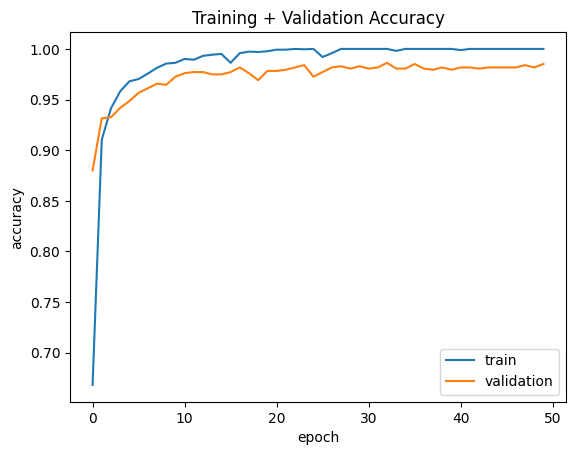

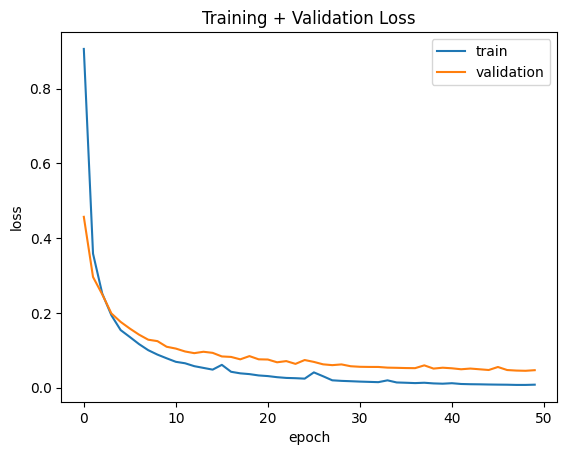

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_results.history['accuracy'])
plt.plot(train_results.history['val_accuracy'])
plt.title('Training + Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(train_results.history['loss'])
plt.plot(train_results.history['val_loss'])
plt.title('Training + Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()


Testing the model

In [ ]:
test_results = gesture_model.evaluate(x=validate_data, y=validate_labels)
print(f'testing loss, testing accuracy:{test_results}')

28/28 [==============================] - 1s 45ms/step - loss: 0.0467 - accuracy: 0.9851
testing loss, testing accuracy:[0.04671677574515343, 0.9851428866386414]


Introduce new images to predict with the trained model

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import io
import PIL
from keras.applications.mobilenet_v2 import preprocess_input


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      video.width = 224; // Set the width of the video element to 224 pixels
      video.height = 224; // Set the height of the video element to 224 pixels
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = 224; // Set the width to 224
      canvas.height = 224; // Set the height to 224
      canvas.getContext('2d').drawImage(video, 0, 0, 224, 224); // Resize the image to 224x224

      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))


  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

  image = PIL.Image.open(io.BytesIO(binary))
  image = image.resize((224,224))
  image_array = np.array(image)
  image_array = preprocess_input(image_array)

  return filename, image_array

In [ ]:
try:
  filename, image_array = take_photo()
  print('Saved to {}'.format(filename))


  # Show the image which was just taken.
  # display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


Using the model to predict on new images

In [ ]:
# pred_data = np.empty((10, 224, 224, 3))
# for i in range(0, 10):
#     im = imread(f'{PRED_IMAGES}/pred_image{i}.png')
#     im = preprocess_input(im)
#     im = resize(im, output_shape=(224, 224))
#     pred_data[i] = im

# pred_labels = np.empty(10)
# pred_labels[:5] = 1
# pred_labels[5:] = 0
# pred_labels

In [ ]:
import os
from keras.models import load_model

# gesture_model.save(os.path.join(MODEL, 'trained_model.keras'))

# reconstructed_model = load_model(os.path.join(MODEL, 'trained_model.keras'))

image_array = np.expand_dims(image_array, axis = 0)

og_prediction = gesture_model.predict(image_array)
# reconstructed_prediction = reconstructed_model.predict(image_array)

print(f"OG Prediction:{og_prediction}")
# print(f"Loaded Model Prediction:{reconstructed_prediction}")


actual_pred = np.argmax(og_prediction, axis=1)

if actual_pred == 0:
  print("Prediction: thumbs down")
elif actual_pred == 1:
  print("Prediction: thumbs up")
elif actual_pred == 2:
  print("Prediction: number 1")
elif actual_pred == 3:
  print("Prediction: number 2")
elif actual_pred == 4:
  print("Prediction: number 3")
elif actual_pred == 5:
  print("Prediction: number 4")
elif actual_pred == 6:
  print("Prediction: number 5")

print(f"Confidence: {og_prediction[0,actual_pred]}")

# print(f'first five predictions (thumbs up = 1): {np.argmax(predictions[:5], axis=1)}')
# print(f'confidence value:                       {np.array(predictions[:5, 1])}')
# print(f'actual vals:                            {pred_labels[:5]}')
# print(f'last five predictions (thumb down = 0): {np.argmax(predictions[5:], axis=1)}')
# print(f'confidence value:                       {np.array(1 - predictions[5:, 1])}')
# print(f'actual vals:                            {pred_labels[5:]}')

1/1 [==============================] - 1s 773ms/step
OG Prediction:[[5.87121690e-07 2.16644015e-02 2.45063711e-06 5.00926690e-04
  2.77211890e-03 9.61937547e-01 1.31220585e-02]]
Loaded Model Prediction:[[5.87121690e-07 2.16644015e-02 2.45063711e-06 5.00926690e-04
  2.77211890e-03 9.61937547e-01 1.31220585e-02]]
Prediction: number 4
Confidence: [0.96193755]
